$$
\begin{array}{ll}
\text{Equation of motion:} & m\ddot{x}(t)+c\dot{x}(t)+kx(t)=f(t) \\[8pt]
\text{where} & \\[2pt]
m & \text{mass }\mathrm{[kg]} \\[2pt]
c & \text{damping coefficient }\mathrm{[N\cdot s/m]} \\[2pt]
k & \text{spring constant }\mathrm{[N/m]} \\[2pt]
x(t) & \text{displacement }\mathrm{[m]} \\[2pt]
\dot{x}(t) & \text{velocity }\mathrm{[m/s]} \\[2pt]
\ddot{x}(t) & \text{acceleration }\mathrm{[m/s^2]} \\[8pt]
\text{Initial conditions:} & x(0)=x_0,\ \dot{x}(0)=v_0 \\[8pt]
\text{Derived parameters:} & \\[2pt]
\omega_n=\sqrt{\frac{k}{m}} & \text{natural frequency }\mathrm{[rad/s]} \\[4pt]
\zeta=\frac{c}{2\sqrt{km}} & \text{damping ratio }[-] \\[4pt]
\omega_d=\omega_n\sqrt{1-\zeta^2} & \text{damped natural frequency }\mathrm{[rad/s]}
\end{array}
$$


$$
\textbf{Free vibration:}\\[4pt]
m\ddot{x}+c\dot{x}+kx=0,\qquad 
\omega_n=\sqrt{\tfrac{k}{m}},\qquad 
\zeta=\tfrac{c}{2\sqrt{km}},\qquad 
x(0)=x_0,\ \dot{x}(0)=v_0.\\[10pt]

\textbf{Characteristic equation:}\\[4pt]
r^2+2\zeta\omega_n r+\omega_n^2=0.\\[10pt]

\textbf{Case 1: Underdamped }(0<\zeta<1)\\[4pt]
\omega_d=\omega_n\sqrt{1-\zeta^2},\\[4pt]
x(t)=e^{-\zeta\omega_n t}\Big[x_0\cos(\omega_d t)
+\tfrac{v_0+\zeta\omega_n x_0}{\omega_d}\sin(\omega_d t)\Big].\\[10pt]

\textbf{Case 2: Critically damped }(\zeta=1)\\[4pt]
r_1=r_2=-\omega_n,\\[4pt]
x(t)=\big(x_0+(v_0+\omega_n x_0)t\big)e^{-\omega_n t}.\\[10pt]

\textbf{Case 3: Overdamped }(\zeta>1)\\[4pt]
r_{1,2}=-\omega_n(\zeta\pm\sqrt{\zeta^2-1}),\\[4pt]
x(t)=A e^{r_1 t}+B e^{r_2 t},\\[4pt]
A=\tfrac{v_0-r_2 x_0}{r_1-r_2},\qquad 
B=\tfrac{r_1 x_0-v_0}{r_1-r_2}.
$$

$$
\begin{aligned}
&\textbf{Integral form:}\quad
\boldsymbol{u}(t_{k+1})-\boldsymbol{u}(t_k)
=\int_{t_k}^{t_{k+1}}\boldsymbol{f}(\boldsymbol{u}(t),t)\,dt.\\[6pt]
&\textbf{AB3 update:}\quad
\boldsymbol{u}_{k+1}
=
\boldsymbol{u}_k
+
\Delta t\left(
\frac{23}{12}\,\boldsymbol{f}_k
-\frac{16}{12}\,\boldsymbol{f}_{k-1}
+\frac{5}{12}\,\boldsymbol{f}_{k-2}
\right),\\[4pt]
&\hspace{22mm}
\boldsymbol{f}_j := \boldsymbol{f}(\boldsymbol{u}_j,t_j),\quad
t_j=t_0+j\,\Delta t.\\[6pt]
&\textbf{Order:}\quad
\text{local } \mathcal{O}(\Delta t^{4}),\quad
\text{global } \mathcal{O}(\Delta t^{3}).\\[4pt]
&\textbf{Startup:}\quad
\text{requires } \boldsymbol{u}_0,\boldsymbol{u}_1,\boldsymbol{u}_2
\text{ (e.g., computed by RK4 or lower-order AB methods).}
\end{aligned}
$$

$$
\begin{aligned}
&\textbf{Integral form:}\quad
\boldsymbol{u}(t_{k+1})-\boldsymbol{u}(t_k)
=\int_{t_k}^{t_{k+1}}\boldsymbol{f}(\boldsymbol{u}(t),t)\,dt.\\[6pt]
&\textbf{FE update:}\quad
\boldsymbol{u}_{k+1}
=
\boldsymbol{u}_k
+
\Delta t\,\boldsymbol{f}(\boldsymbol{u}_k,t_k).\\[6pt]
&\textbf{Order:}\quad
\text{local } \mathcal{O}(\Delta t^{2}),\quad
\text{global } \mathcal{O}(\Delta t).\\[4pt]
&\textbf{Stability (test eq.\ }u'=\lambda u\text{):}\quad
|1+\Delta t\,\lambda|\le1
\quad\Rightarrow\quad
\text{disk centered at } -1 \text{ with radius } 1.
\end{aligned}
$$

In [ ]:
# Requirements: numpy, matplotlib

In [2]:
# ============================================================
# Mass–Spring–Damper System: Figure Generator (Paper-ready)
# ============================================================
# Author: [Your Name]
# Course: AE370 Numerical Methods
# Institution: University of Illinois Urbana–Champaign
# Description:
#   This script generates figures for a mass–spring–damper system.
#   It includes analytical and numerical simulations (Forward Euler, AB3)
#   and their error convergence plots for publication-quality presentation.
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
import os

# ============================================================
# Analytical (True) Solution
# ============================================================
def f_true(t, x0=1.0, v0=0.0, m=1.0, c=0.1, k=1.0):
    """
    Returns the analytical (true) displacement and velocity for the
    mass–spring–damper system with no external force:

        m*x_ddot + c*x_dot + k*x = 0.

    The damping regime is automatically determined via the damping ratio
        ζ = c / (2*sqrt(k*m)).

    ----------
    Input
    ----------
    t : float or array_like
        Time(s) at which to evaluate the true solution.
    x0 : float
        Initial displacement [m].
    v0 : float
        Initial velocity [m/s].
    m : float
        Mass [kg].
    c : float
        Damping coefficient [N·s/m].
    k : float
        Spring constant [N/m].

    ----------
    Output
    ----------
    x_true : ndarray
        Analytical displacement at each time t.
    v_true : ndarray
        Analytical velocity at each time t.

    ----------
    Notes
    ----------
    Let ω_n = sqrt(k/m), ζ = c/(2*sqrt(k*m)).

    1) Underdamped (0 < ζ < 1):
         ω_d = ω_n * sqrt(1 - ζ^2)
         x(t) = e^{-ζω_n t} [ x0 cos(ω_d t)
                 + ((v0 + ζω_n x0)/ω_d) sin(ω_d t) ]

    2) Critically damped (ζ = 1):
         x(t) = ( x0 + (v0 + ω_n x0) t ) e^{-ω_n t}

    3) Overdamped (ζ > 1):
         r1,2 = -ω_n ( ζ ± sqrt(ζ^2 - 1) )
         x(t) = A e^{r1 t} + B e^{r2 t},
         A = (v0 - r2 x0)/(r1 - r2),
         B = (r1 x0 - v0)/(r1 - r2)
    """
    t = np.asarray(t, dtype=float)
    omega_n = np.sqrt(k / m)
    zeta = c / (2.0 * np.sqrt(k * m))

    # Underdamped case
    if zeta < 1.0:
        omega_d = omega_n * np.sqrt(1.0 - zeta**2)
        C1 = x0
        C2 = (v0 + zeta * omega_n * x0) / omega_d
        exp_term = np.exp(-zeta * omega_n * t)
        cosd = np.cos(omega_d * t)
        sind = np.sin(omega_d * t)
        x_true = exp_term * (C1 * cosd + C2 * sind)
        v_true = exp_term * (
            -C1 * omega_d * sind + C2 * omega_d * cosd
        ) - zeta * omega_n * x_true

    # Critically damped case
    elif np.isclose(zeta, 1.0, atol=1e-9):
        r = -omega_n
        x_true = (x0 + (v0 + omega_n * x0) * t) * np.exp(r * t)
        v_true = ((v0 + omega_n * x0) + r * (x0 + (v0 + omega_n * x0) * t)) * np.exp(r * t)

    # Overdamped case
    else:
        s = np.sqrt(zeta**2 - 1.0)
        r1 = -omega_n * (zeta - s)
        r2 = -omega_n * (zeta + s)
        A = (v0 - r2 * x0) / (r1 - r2)
        B = (r1 * x0 - v0) / (r1 - r2)
        e1 = np.exp(r1 * t)
        e2 = np.exp(r2 * t)
        x_true = A * e1 + B * e2
        v_true = r1 * A * e1 + r2 * B * e2

    return x_true, v_true


# ============================================================
# ODE Right-hand Side Function
# ============================================================
def f_rhs(u, t=0.0, m=1.0, c=0.1, k=1.0):
    """
    Computes the time derivative du/dt = [x', v'] for the
    mass–spring–damper system without external forcing.

        x' = v
        v' = -(c/m)*v - (k/m)*x

    ----------
    Input
    ----------
    u : array_like
        Current state vector [x, v].
    t : float, optional
        Current time (not used, for interface consistency).
    m, c, k : float, optional
        System parameters.

    ----------
    Output
    ----------
    u_dot : ndarray
        Time derivative [x', v'].
    """
    x, v = np.asarray(u, dtype=float)
    return np.array([v, -(c/m)*v - (k/m)*x], dtype=float)


# ============================================================
# Numerical Methods
# ============================================================
def forward_euler(u_k, delta_t, t_k=0.0, m=1.0, c=0.1, k=1.0):
    """
    Advances one time step using the Forward Euler method:

        u_{k+1} = u_k + Δt * f(u_k, t_k)

    ----------
    Input
    ----------
    u_k : array_like
        Current state vector [x, v].
    delta_t : float
        Time step size Δt.
    t_k : float, optional
        Current time (passed to f for interface consistency).
    m : float, optional
        Mass [kg].
    c : float, optional
        Damping coefficient [N·s/m].
    k : float, optional
        Spring constant [N/m].

    ----------
    Output
    ----------
    u_next : ndarray
        Next state vector [x, v] at time t_k + Δt.
    """
    return u_k + delta_t * f_rhs(u_k, t_k, m=m, c=c, k=k)


def ivp_forward_euler(u_0, T, delta_t, m=1.0, c=0.1, k=1.0):
    """
    Integrates the IVP over [0, T] using Forward Euler.

        u' = f(u, t),  u(0) = u_0

    ----------
    Input
    ----------
    u_0 : array_like
        Initial state vector [x0, v0].
    T : float
        Final time.
    delta_t : float
        Time step size Δt.
    m : float, optional
        Mass [kg].
    c : float, optional
        Damping coefficient [N·s/m].
    k : float, optional
        Spring constant [N/m].

    ----------
    Output
    ----------
    u : ndarray, shape (K, 2)
        States at each time grid point.
    times : ndarray, shape (K,)
        Time grid from 0 to T with spacing Δt.
    """
    u_0 = np.asarray(u_0, dtype=float)
    K = int(np.floor(T / delta_t)) + 1
    times = np.linspace(0.0, (K - 1) * delta_t, K)

    u = np.zeros((K, u_0.size), dtype=float)
    u[0, :] = u_0
    for i in range(K - 1):
        u[i + 1, :] = forward_euler(u[i, :], delta_t, t_k=times[i], m=m, c=c, k=k)
    return u, times


def _rk4_start_step(u_k, delta_t, t_k=0.0, m=1.0, c=0.1, k=1.0):
    """
    Performs a single RK4 step. Used only to bootstrap AB3 (to obtain u1 and u2).

    ----------
    Input
    ----------
    u_k : array_like
        Current state vector [x, v].
    delta_t : float
        Time step size Δt.
    t_k : float, optional
        Current time.
    m, c, k : float, optional
        System parameters (see f_true).

    ----------
    Output
    ----------
    u_next : ndarray
        Next state vector after one RK4 step.
    """
    k1 = f_rhs(u_k, t_k, m=m, c=c, k=k)
    k2 = f_rhs(u_k + 0.5 * delta_t * k1, t_k + 0.5 * delta_t, m=m, c=c, k=k)
    k3 = f_rhs(u_k + 0.5 * delta_t * k2, t_k + 0.5 * delta_t, m=m, c=c, k=k)
    k4 = f_rhs(u_k + delta_t * k3, t_k + delta_t, m=m, c=c, k=k)
    return u_k + (delta_t / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)


def ab3(u_k, u_km1, u_km2, f_k, f_km1, f_km2, delta_t):
    """
    Third-order Adams–Bashforth (explicit multistep) update:

        u_{n+1} = u_n + Δt * [ (23/12) f_n - (16/12) f_{n-1} + (5/12) f_{n-2} ]

    ----------
    Input
    ----------
    u_k : array_like
        State at step n        (u_n).
    u_km1 : array_like
        State at step n - 1    (u_{n-1}).
    u_km2 : array_like
        State at step n - 2    (u_{n-2}).
    f_k : array_like
        f(u_n, t_n).
    f_km1 : array_like
        f(u_{n-1}, t_{n-1}).
    f_km2 : array_like
        f(u_{n-2}, t_{n-2}).
    delta_t : float
        Time step size Δt.

    ----------
    Output
    ----------
    u_next : ndarray
        State at step n + 1.
    """
    return u_k + delta_t * (
        (23.0 / 12.0) * f_k - (16.0 / 12.0) * f_km1 + (5.0 / 12.0) * f_km2
    )


def ivp_ab3(u_0, T, delta_t, m=1.0, c=0.1, k=1.0):
    """
    Integrates the IVP over [0, T] using the third-order Adams–Bashforth method (AB3).
    Two RK4 startup steps are used to obtain u1 and u2.

    ----------
    Input
    ----------
    u_0 : array_like
        Initial state vector [x0, v0].
    T : float
        Final time.
    delta_t : float
        Time step size Δt.
    m : float, optional
        Mass [kg].
    c : float, optional
        Damping coefficient [N·s/m].
    k : float, optional
        Spring constant [N/m].

    ----------
    Output
    ----------
    u : ndarray, shape (K, 2)
        States at each time grid point.
    times : ndarray, shape (K,)
        Time grid from 0 to T with spacing Δt.

    ----------
    Notes
    ----------
    AB3 requires two previous steps; here we generate them via RK4 for startup.
    """
    u_0 = np.asarray(u_0, dtype=float)
    K = int(np.floor(T / delta_t)) + 1
    times = np.linspace(0.0, (K - 1) * delta_t, K)

    u = np.zeros((K, u_0.size), dtype=float)
    u[0, :] = u_0

    # Startup with two RK4 steps to get u1, u2
    if K >= 2:
        u[1, :] = _rk4_start_step(u[0, :], delta_t, t_k=times[0], m=m, c=c, k=k)
    if K >= 3:
        u[2, :] = _rk4_start_step(u[1, :], delta_t, t_k=times[1], m=m, c=c, k=k)

    # AB3 main loop
    for n in range(2, K - 1):
        f_n   = f_rhs(u[n,   :], times[n],   m=m, c=c, k=k)
        f_nm1 = f_rhs(u[n-1, :], times[n-1], m=m, c=c, k=k)
        f_nm2 = f_rhs(u[n-2, :], times[n-2], m=m, c=c, k=k)
        u[n + 1, :] = ab3(u[n, :], u[n - 1, :], u[n - 2, :], f_n, f_nm1, f_nm2, delta_t)

    return u, times


# -----------------------------
# Error helpers (vs analytical)
# -----------------------------
def ab3_error_against_true(u_0, T, delta_t, m=1.0, c=0.1, k=1.0):
    """
    Computes the relative error at final time comparing AB3 to the analytical (true) solution:

        err = ||u_AB3(T) - u_true(T)|| / ||u_true(T)||

    ----------
    Input
    ----------
    u_0 : array_like
        Initial state vector [x0, v0].
    T : float
        Final time.
    delta_t : float
        Time step size Δt.
    m, c, k : float, optional
        System parameters.

    ----------
    Output
    ----------
    err : float
        Relative error at time T (L2 norm on state).
    """
    u_num, _ = ivp_ab3(u_0, T, delta_t, m=m, c=c, k=k)
    xT_true, vT_true = f_true(T, x0=u_0[0], v0=u_0[1], m=m, c=c, k=k)
    u_true_T = np.array([xT_true, vT_true], dtype=float)
    num = np.linalg.norm(u_num[-1, :] - u_true_T)
    den = max(np.linalg.norm(u_true_T), 1e-15)
    return num / den


def fe_error_against_true(u_0, T, delta_t, m=1.0, c=0.1, k=1.0):
    """
    Computes the relative error at final time comparing Forward Euler to the analytical (true) solution:

        err = ||u_FE(T) - u_true(T)|| / ||u_true(T)||

    ----------
    Input
    ----------
    u_0 : array_like
        Initial state vector [x0, v0].
    T : float
        Final time.
    delta_t : float
        Time step size Δt.
    m, c, k : float, optional
        System parameters.

    ----------
    Output
    ----------
    err : float
        Relative error at time T (L2 norm on state).
    """
    u_num, _ = ivp_forward_euler(u_0, T, delta_t, m=m, c=c, k=k)
    xT_true, vT_true = f_true(T, x0=u_0[0], v0=u_0[1], m=m, c=c, k=k)
    u_true_T = np.array([xT_true, vT_true], dtype=float)
    num = np.linalg.norm(u_num[-1, :] - u_true_T)
    den = max(np.linalg.norm(u_true_T), 1e-15)
    return num / den



# ============================================================
# Parameter Setup (Three Damping Cases)
# ============================================================
def params_for_subcase(subcase):
    """
    Returns the parameters (m, c, k, ζ, ω_n) for subcases A1–A3,
    keeping the natural frequency fixed at ω_n = 2.0 (since k/m = 4).

    ----------
    Input
    ----------
    subcase : str
        Identifier string for the test case. Must be one of:
        'A1' → underdamped (ζ = 0.05)
        'A2' → critically damped (ζ = 1.00)
        'A3' → overdamped (ζ = 1.25)

    ----------
    Output
    ----------
    m : float
        Mass [kg].
    c : float
        Damping coefficient [N·s/m].
    k : float
        Spring constant [N/m].
    zeta : float
        Damping ratio (dimensionless).
    omega_n : float
        Natural frequency [rad/s].

    ----------
    Notes
    ----------
    - Each subcase is chosen such that the ratio k/m = 4, giving ω_n = 2.0.
    - The damping coefficient c is computed from the damping ratio:
          c = 2 * ζ * sqrt(k * m)
    - This function is used by all figure-generation routines.
    """
    if subcase == "A1":
        m, k, zeta = 1.0, 4.0, 0.05   # underdamped
    elif subcase == "A2":
        m, k, zeta = 1.5, 6.0, 1.00   # critically damped
    elif subcase == "A3":
        m, k, zeta = 0.8, 3.2, 1.25   # overdamped
    else:
        raise ValueError("subcase must be one of {'A1', 'A2', 'A3'}")

    c = 2.0 * zeta * np.sqrt(k * m)
    omega_n = np.sqrt(k / m)

    return m, c, k, zeta, omega_n



# ============================================================
# Figure Generators (6.1–6.4)
# ============================================================

def make_fig_damping_cases():
    """Figure 6.1: Displacement vs time for A1–A3 (Analytical only)."""
    T = 10.0
    dt = 0.01
    t = np.arange(0.0, T + dt / 2, dt)
    x0, v0 = 1.0, 0.0

    # --- Ensure output folder exists ---
    os.makedirs("figures", exist_ok=True)

    fig, ax = plt.subplots(figsize=(8, 4.8))
    for subcase, label in [
        ("A1", "A1 (ζ=0.05) — Analytical"),
        ("A2", "A2 (ζ=1.00) — Analytical"),
        ("A3", "A3 (ζ=1.25) — Analytical"),
    ]:
        m, c, k, zeta, omega_n = params_for_subcase(subcase)
        x_true, _ = f_true(t, x0=x0, v0=v0, m=m, c=c, k=k)
        ax.plot(t, x_true, lw=1.6, label=label)

    ax.set_title(r"Analytical displacement for different damping ratios ($\omega_n=2.0$)")
    ax.set_xlabel("time t [s]")
    ax.set_ylabel("displacement x(t) [m]")
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()

    
    # --- Save figure into the folder ---
    save_path = os.path.join("fig_damping_cases.png")
    plt.savefig(save_path, dpi=200)
    plt.close(fig)
    print(f"[OK] Saved: {save_path}")



def make_fig_init_conditions():
    """Figure 6.2: Effect of initial conditions (Analytical only, A1 physics)."""
    m, c, k, zeta, omega_n = params_for_subcase("A1")
    T = 10.0
    dt = 0.01
    t = np.arange(0.0, T + dt / 2, dt)
    cases = [("x0=1,v0=0"), ("x0=0,v0=1"), ("x0=1,v0=1")]

    fig, ax = plt.subplots(figsize=(8, 4.8))
    for case, (x0, v0) in zip(cases, [(1.0, 0.0), (0.0, 1.0), (1.0, 1.0)]):
        x_true, _ = f_true(t, x0=x0, v0=v0, m=m, c=c, k=k)
        ax.plot(t, x_true, lw=1.6, label=f"{case}")
    ax.set_title("Effect of initial conditions (Analytical, ζ=0.05, ωn=2.0)")
    ax.set_xlabel("time t [s]")
    ax.set_ylabel("displacement x(t) [m]")
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()


    # --- Save figure into the folder ---
    save_path = os.path.join("fig_init_conditions.png")
    plt.savefig(save_path, dpi=200)
    plt.close(fig)
    print(f"[OK] Saved: {save_path}")


def make_fig_method_compare():
    """Figure 6.3: Analytical vs Numerical (FE/AB3)."""
    m, c, k, zeta, omega_n = params_for_subcase("A1")
    u0 = np.array([1.0, 0.0])
    T = 10.0
    dt_plot = 0.05

    u_ab3, t = ivp_ab3(u0, T, dt_plot, m=m, c=c, k=k)
    u_fe, _ = ivp_forward_euler(u0, T, dt_plot, m=m, c=c, k=k)
    x_true, _ = f_true(t, x0=1.0, v0=0.0, m=m, c=c, k=k)

    fig, ax = plt.subplots(figsize=(8, 4.8))
    ax.plot(t, x_true, "k--", lw=1.6, label="Analytical (true)")
    ax.plot(t, u_ab3[:, 0], lw=1.6, label="AB3 (Δt=0.05)")
    ax.plot(t, u_fe[:, 0], ":", lw=1.8, label="Forward Euler (Δt=0.05)")
    ax.set_title("Comparison of Analytical and Numerical Methods (Case A1)")
    ax.set_xlabel("time t [s]")
    ax.set_ylabel("displacement x(t) [m]")
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()

    # --- Save figure into the folder ---
    save_path = os.path.join("fig_method_compare.png")
    plt.savefig(save_path, dpi=200)
    plt.close(fig)
    print(f"[OK] Saved: {save_path}")


def make_fig_convergence():
    """Figure 6.4: Convergence vs Analytical Solution (AB3 and FE)."""
    m, c, k, zeta, omega_n = params_for_subcase("A1")
    u0 = np.array([1.0, 0.0])
    T = 10.0
    dt_list = np.array([1.0, 0.5, 0.25, 0.2, 0.1, 0.05, 0.025, 0.0125])

    errs_ab3 = np.array([ab3_error_against_true(u0, T, dt, m, c, k) for dt in dt_list])
    errs_fe = np.array([fe_error_against_true(u0, T, dt, m, c, k) for dt in dt_list])

    fig, ax = plt.subplots(figsize=(7, 5))
    ax.loglog(dt_list, errs_ab3, "o-", label="AB3 (order~3)")
    ax.loglog(dt_list, errs_fe, "s--", label="Forward Euler (order~1)")
    ref3 = errs_ab3[-1] * (dt_list / dt_list[-1])**3
    ref1 = errs_fe[-1] * (dt_list / dt_list[-1])**1
    ax.loglog(dt_list, ref3, "k--", label="~ Δt³ reference")
    ax.loglog(dt_list, ref1, "k:", label="~ Δt¹ reference")
    ax.set_title("Final-time relative error vs step size Δt (Case A1)")
    ax.set_xlabel(r"$\Delta t$")
    ax.set_ylabel("Relative error at final time")
    ax.legend()
    ax.grid(True, which="both", alpha=0.3)
    plt.tight_layout()


    # --- Save figure into the folder ---
    save_path = os.path.join("figures", "fig_convergence.png")
    plt.savefig(save_path, dpi=200)
    plt.close(fig)
    print(f"[OK] Saved: {save_path}")






# -----------------------------
# MAIN: build all paper figures
# -----------------------------
if __name__ == "__main__":
    make_fig_damping_cases()
    make_fig_init_conditions()
    make_fig_method_compare()
    make_fig_convergence()

    print("Saved figures:")
    print("  fig_damping_cases.png   [Analytical only]")
    print("  fig_init_conditions.png [Analytical only]")
    print("  fig_method_compare.png  [Analytical vs Numerical (FE/AB3)]")
    print("  fig_convergence.png     [Numerical (FE/AB3) vs Analytical]")


[OK] Saved: fig_damping_cases.png
[OK] Saved: fig_init_conditions.png
[OK] Saved: fig_method_compare.png
[OK] Saved: figures/fig_convergence.png
Saved figures:
  fig_damping_cases.png   [Analytical only]
  fig_init_conditions.png [Analytical only]
  fig_method_compare.png  [Analytical vs Numerical (FE/AB3)]
  fig_convergence.png     [Numerical (FE/AB3) vs Analytical]


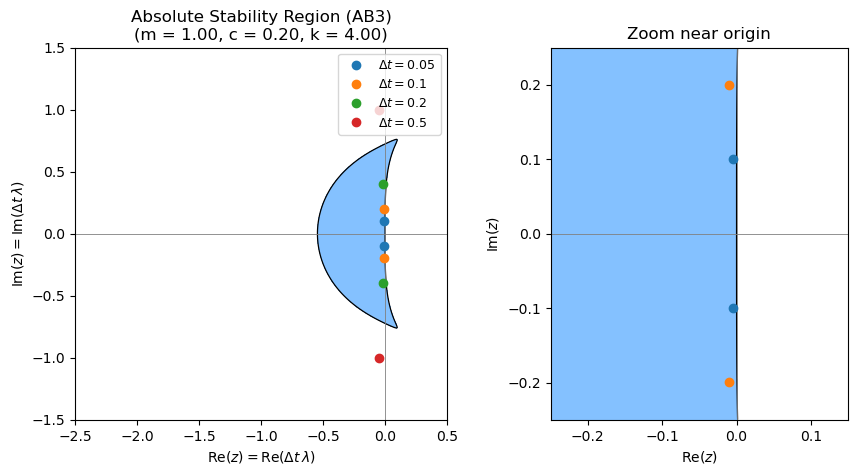

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ============================================================
# AB3 absolute stability region + MSD eigenvalue overlay
# ============================================================

# -----------------------------
# Eigenvalues for mass-spring-damper
# A = [[0, 1], [ -k/m, -c/m ]]
# λ = -ζ ω_n ± i ω_d,  with  ω_n = sqrt(k/m),  ζ = c/(2 sqrt(k m))
# -----------------------------
def msd_eigs(m=1.0, c=0.1, k=1.0):
    omega_n = np.sqrt(k/m)
    zeta    = c / (2.0*np.sqrt(k*m))
    if zeta < 1.0:                    # underdamped: complex conjugate
        omega_d = omega_n*np.sqrt(1.0 - zeta**2)
        l1 = -zeta*omega_n + 1j*omega_d
        l2 = -zeta*omega_n - 1j*omega_d
        return np.array([l1, l2])
    elif np.isclose(zeta, 1.0):       # critical: repeated real root
        l = -omega_n
        return np.array([l, l])
    else:                             # overdamped: two distinct real negatives
        s  = np.sqrt(zeta**2 - 1.0)
        r1 = -omega_n*(zeta - s)
        r2 = -omega_n*(zeta + s)
        return np.array([r1, r2])

# -----------------------------
# AB3 characteristic polynomial in ξ for a given z = Δt λ:
#   ξ^3 - ξ^2 - z*(23/12 ξ^2 - 16/12 ξ + 5/12) = 0
# Coeffs in decreasing powers of ξ:
#   [1,  (-1 - 23 z/12),  (16 z/12),  (-5 z/12)]
# -----------------------------
def ab3_max_root_modulus(z):
    a3 = 1.0
    a2 = -1.0 - (23.0/12.0)*z
    a1 = (16.0/12.0)*z
    a0 = -(5.0/12.0)*z
    roots = np.roots([a3, a2, a1, a0])
    return np.max(np.abs(roots))

# -----------------------------
# Plot AB3 stability region
# -----------------------------
def plot_ab3_region(ax=None, xlim=(-4.5, 1.0), ylim=(-3.5, 3.5), draw_outline=True, density=900):
    """
    Draws the absolute stability region for AB3 in the z-plane.
    Stable if max |ξ| ≤ 1 for the multistep characteristic polynomial.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(4.8, 4.8))

    xr = np.linspace(xlim[0], xlim[1], density)
    yi = np.linspace(ylim[0], ylim[1], density)
    X, Y = np.meshgrid(xr, yi)
    Z = X + 1j*Y

    # Compute max root modulus on the grid
    Rmax = np.empty_like(X, dtype=float)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Rmax[i, j] = ab3_max_root_modulus(Z[i, j])

    stable = (Rmax <= 1.0).astype(float)

    # === Color settings ===
    blue_fill = [0.2, 0.6, 1.0, 0.6]   # translucent blue for stability region
    cmap = ListedColormap([blue_fill])

    
    ax.contourf(X, Y, stable, levels=[0.5, 1.5], cmap=cmap)
    if draw_outline:
        ax.contour(X, Y, Rmax, levels=[1.0], colors='k', linewidths=0.9)

    ax.set_xlim(*xlim); ax.set_ylim(*ylim)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel(r'$\mathrm{Re}(z)=\mathrm{Re}(\Delta t\,\lambda)$')
    ax.set_ylabel(r'$\mathrm{Im}(z)=\mathrm{Im}(\Delta t\,\lambda)$')
    ax.set_title('Absolute Stability Region (AB3)')
    ax.axhline(0, color='gray', lw=0.6)
    ax.axvline(0, color='gray', lw=0.6)
    return ax

# -----------------------------
# Overlay MSD eigenvalues scaled by Δt
# -----------------------------
def overlay_msd_eigs(ax, dt, m=1.0, c=0.1, k=1.0, color='C0', label=None, annotate=True):
    eigs = msd_eigs(m=m, c=c, k=k)
    z = dt * eigs
    ax.plot(np.real(z), np.imag(z), 'o', color=color, label=label or rf'$\Delta t={dt}$')
    if annotate:
        for zi in z:
            ax.annotate(f'{zi.real:.2f}+{zi.imag:.2f}i', (zi.real, zi.imag),
                        textcoords='offset points', xytext=(6,6), fontsize=8, color=color)
    return z



# -----------------------------
# Example usage (with zoomed-in panel)
# -----------------------------
if __name__ == "__main__":
    # ===== Parameters (edit here) =====
    # You can change these values to explore different damping regimes.
    # ζ = c/(2*sqrt(k*m))  ;  ω_n = sqrt(k/m)
    m, c, k = 1.0, 0.2, 4.0      # underdamped example
    dts = [0.05, 0.1, 0.2, 0.5]  # step sizes to overlay
    # ==================================

    colors = ['C0', 'C1', 'C2', 'C3']

    fig, (ax_full, ax_zoom) = plt.subplots(1, 2, figsize=(9, 4.6), constrained_layout=True)

    # --- (A) Full view (same as before) ---
    plot_ab3_region(ax=ax_full, xlim=(-2.5, 0.5), ylim=(-1.5, 1.5), density=1200)
    for dt, col in zip(dts, colors):
        overlay_msd_eigs(ax_full, dt, m=m, c=c, k=k, color=col, label=rf'$\Delta t={dt}$', annotate=False)
    ax_full.legend(loc='upper right', frameon=True, fontsize=9)
    ax_full.set_title(f'Absolute Stability Region (AB3)\n(m = {m:.2f}, c = {c:.2f}, k = {k:.2f})')

    # --- (B) Zoomed-in view near the origin ---
    # Tighten the limits to see how close z = Δtλ is to the boundary
    plot_ab3_region(ax=ax_zoom, xlim=(-0.25, 0.15), ylim=(-0.25, 0.25), density=1200)
    for dt, col in zip(dts, colors):
        overlay_msd_eigs(ax_zoom, dt, m=m, c=c, k=k, color=col, label=None, annotate=False)
    ax_zoom.set_title('Zoom near origin')
    ax_zoom.set_xlabel(r'$\mathrm{Re}(z)$')
    ax_zoom.set_ylabel(r'$\mathrm{Im}(z)$')

    plt.show()



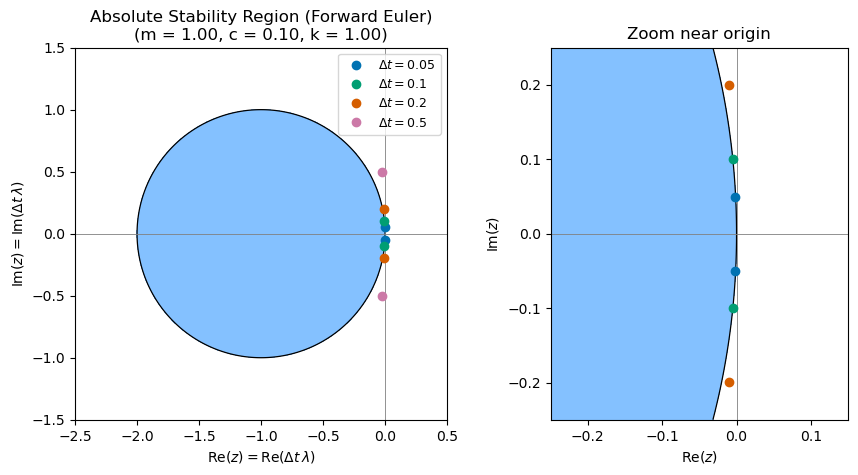

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ============================================================
# Forward Euler absolute stability region + MSD eigenvalue overlay
# ============================================================

# -----------------------------
# Eigenvalues for mass-spring-damper
# A = [[0, 1], [ -k/m, -c/m ]]
# λ = -ζ ω_n ± i ω_d,  with  ω_n = sqrt(k/m),  ζ = c/(2 sqrt(k m))
# -----------------------------
def msd_eigs(m=1.0, c=0.2, k=4.0):
    omega_n = np.sqrt(k/m)
    zeta    = c / (2.0*np.sqrt(k*m))
    if zeta < 1.0:                    # underdamped: complex conjugate
        omega_d = omega_n*np.sqrt(1.0 - zeta**2)
        l1 = -zeta*omega_n + 1j*omega_d
        l2 = -zeta*omega_n - 1j*omega_d
        return np.array([l1, l2])
    elif np.isclose(zeta, 1.0):       # critical: repeated real root
        l = -omega_n
        return np.array([l, l])
    else:                             # overdamped: two distinct real negatives
        s  = np.sqrt(zeta**2 - 1.0)
        r1 = -omega_n*(zeta - s)
        r2 = -omega_n*(zeta + s)
        return np.array([r1, r2])

# -----------------------------
# Forward Euler stability function:
#   R_FE(z) = 1 + z
# Stable if |R_FE(z)| <= 1  ⇔  |1+z| <= 1  (disk centered at -1 with radius 1)
# -----------------------------
def R_fe(z):
    return 1.0 + z

# -----------------------------
# Plot Forward Euler stability region
# -----------------------------
def plot_fe_region(ax=None, xlim=(-2.5, 0.5), ylim=(-1.5, 1.5), density=1200, draw_outline=True):
    """
    Draws the absolute stability region for Forward Euler in the z-plane.
    Stable if |1 + z| <= 1, where z = Δt λ.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(4.8, 4.8))

    xr = np.linspace(xlim[0], xlim[1], density)
    yi = np.linspace(ylim[0], ylim[1], density)
    X, Y = np.meshgrid(xr, yi)
    Z = X + 1j*Y

    A = np.abs(R_fe(Z))
    stable = (A <= 1.0).astype(float)

    # Color settings (translucent blue fill for stability region)
    blue_fill = [0.2, 0.6, 1.0, 0.6]
    cmap = ListedColormap([blue_fill])

    ax.contourf(X, Y, stable, levels=[0.5, 1.5], cmap=cmap)
    if draw_outline:
        ax.contour(X, Y, A, levels=[1.0], colors='k', linewidths=0.9)

    ax.set_xlim(*xlim); ax.set_ylim(*ylim)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel(r'$\mathrm{Re}(z)=\mathrm{Re}(\Delta t\,\lambda)$')
    ax.set_ylabel(r'$\mathrm{Im}(z)=\mathrm{Im}(\Delta t\,\lambda)$')
    ax.set_title('Absolute Stability Region (Forward Euler)')
    ax.axhline(0, color='gray', lw=0.6)
    ax.axvline(0, color='gray', lw=0.6)
    return ax

# -----------------------------
# Overlay MSD eigenvalues scaled by Δt
# -----------------------------
def overlay_msd_eigs(ax, dt, m=1.0, c=0.1, k=1.0, color='C0', label=None, annotate=True):
    eigs = msd_eigs(m=m, c=c, k=k)
    z = dt * eigs
    ax.plot(np.real(z), np.imag(z), 'o', color=color, label=label or rf'$\Delta t={dt}$')
    if annotate:
        for zi in z:
            ax.annotate(f'{zi.real:.2f}+{zi.imag:.2f}i', (zi.real, zi.imag),
                        textcoords='offset points', xytext=(6,6), fontsize=8, color=color)
    return z

# -----------------------------
# Example usage (with zoomed-in panel)
# -----------------------------
if __name__ == "__main__":
    # ===== Parameters (edit here) =====
    # You can change these values to explore different damping regimes.
    # ζ = c/(2*sqrt(k*m))  ;  ω_n = sqrt(k/m)
    m, c, k = 1.0, 0.1, 1.0      # underdamped example
    dts = [0.05, 0.1, 0.2, 0.5]  # step sizes to overlay
    # ==================================

    colors = ['#0072B2', '#009E73', '#D55E00', '#CC79A7']  # blue, green, orange, magenta

    fig, (ax_full, ax_zoom) = plt.subplots(1, 2, figsize=(9, 4.6), constrained_layout=True)

    # --- (A) Full view (same as before) ---
    plot_fe_region(ax=ax_full, xlim=(-2.5, 0.5), ylim=(-1.5, 1.5), density=1200)
    for dt, col in zip(dts, colors):
        overlay_msd_eigs(ax_full, dt, m=m, c=c, k=k, color=col, label=rf'$\Delta t={dt}$', annotate=False)
    ax_full.legend(loc='upper right', frameon=True, fontsize=9)
    ax_full.set_title(f'Absolute Stability Region (Forward Euler)\n(m = {m:.2f}, c = {c:.2f}, k = {k:.2f})')


    # --- (B) Zoomed-in view near the origin ---
    # Tighten the limits to see how close z = Δtλ is to the boundary
    plot_fe_region(ax=ax_zoom, xlim=(-0.25, 0.15), ylim=(-0.25, 0.25), density=1200)
    for dt, col in zip(dts, colors):
        overlay_msd_eigs(ax_zoom, dt, m=m, c=c, k=k, color=col, label=None, annotate=False)
    ax_zoom.set_title('Zoom near origin')
    ax_zoom.set_xlabel(r'$\mathrm{Re}(z)$')
    ax_zoom.set_ylabel(r'$\mathrm{Im}(z)$')

    plt.show()



In [30]:
# --- Cost comparison at a target error (robust) ---
target_error = 0.5

# 1) Make sure we have the same physics used in your figures (Case A1)
m, c, k, zeta, omega_n = params_for_subcase("A1")
u0 = np.array([1.0, 0.0])
T  = 10.0
dt_list = np.array([1.0, 0.5, 0.25, 0.2, 0.1, 0.05, 0.025, 0.0125], dtype=float)  # your list

# 2) Compute errors against the analytical solution
errs_ab3 = np.array([ab3_error_against_true(u0, T, dt, m=m, c=c, k=k) for dt in dt_list])
errs_fe  = np.array([fe_error_against_true (u0, T, dt, m=m, c=c, k=k) for dt in dt_list])

# 3) Helper: pick the LARGEST Δt that still meets the error target
def largest_dt_meeting_target(errs, dts, target):
    idx = np.where(errs < target)[0]
    if idx.size == 0:
        return None
    # choose the max Δt among those indices (works for any ordering of dts)
    return dts[idx[np.argmax(dts[idx])]]

dt_ab3_target = largest_dt_meeting_target(errs_ab3, dt_list, target_error)
dt_fe_target  = largest_dt_meeting_target(errs_fe,  dt_list, target_error)

if (dt_ab3_target is not None) and (dt_fe_target is not None):
    cost_ratio = dt_fe_target / dt_ab3_target  # steps ~ 1/Δt → ratio of steps ≈ 1/cost_ratio
    print(f"\nFor the same target error ({target_error:g}):")
    print(f"  AB3 can use Δt ≈ {dt_ab3_target:.5f}, FE needs Δt ≈ {dt_fe_target:.5f}")
    print(f"  → AB3 requires roughly 1/{cost_ratio:.1f} the number of time steps.")
else:
    # Helpful diagnostics so you know what to tweak
    print("\nTarget not reached for at least one method.")
    print(f"  min AB3 error = {errs_ab3.min():.3e} at Δt = {dt_list[np.argmin(errs_ab3)]:.5f}")
    print(f"  min FE  error = {errs_fe.min():.3e} at Δt = {dt_list[np.argmin(errs_fe)]:.5f}")
    print("Try lowering target_error, or extend dt_list with smaller Δt values (e.g., 0.00625, 0.003125).")




For the same target error (0.5):
  AB3 can use Δt ≈ 0.20000, FE needs Δt ≈ 0.01250
  → AB3 requires roughly 1/0.1 the number of time steps.
